## 신경망

`계단 함수 구현하기`

In [1]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

    - 해당 함수는 인수로 실수(부동소수점)만 받아들임
    step_function(3.0)은 가능하지만, 넘파이 배열을 인수로 넣을 수 없음
    function(np.array([1.0, 2.0)])) 이 안되, 넘파이 배열을 지원하도록 수정

In [2]:
def setp_function(x):
    y = x > 0
    return y.astype(np.int)

In [3]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)

y = x>0
print(y)

[-1.  1.  2.]
[False  True  True]


In [4]:
y = y.astype(np.int)
print(y)

[0 1 1]


<ipython-input-4-fc63beb3acb9>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


    - 파이썬에서는 bool을 int로 변환하면 True는 1로 False는 0으로 변환됨

`계단 함수의 그래프`

<ipython-input-5-70a7a9811c3c>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype=np.int)


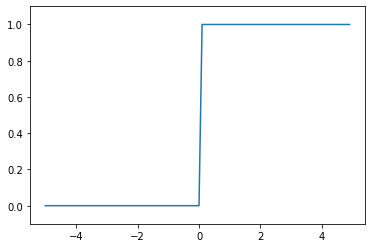

In [5]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)  # y축의 범위
plt.show();

    - np.arange(-5.0, 5.0, 0.1)은 -5.0에서 5.0 전까지 0.1 간격의 넘파이 배열 생성
    즉, [-5.0, -4.9, ... 4.9] 
    - 계단 함수는 0을 경계로 출력이 0에서 1(또는 1에서 0으로) 바뀜

`시그모이드 함수 구현`

In [6]:
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

In [7]:
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


    - 넘파이의 브로드캐스트 기능으로 넘파이 배열과 스칼라값의 연산을 
    넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행

In [8]:
# 넘파이의 브로드캐스트
t = np.array([1.0, 2.0, 3.0])
1.0 + t
print(1.0+t)

[2. 3. 4.]


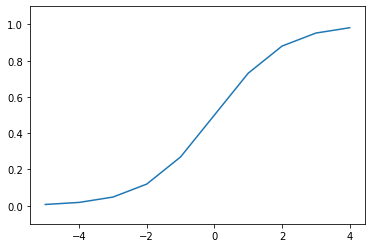

In [9]:
x = np.arange(-5.0, 5.0, 1.0)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

`ReLu 함수 구현`

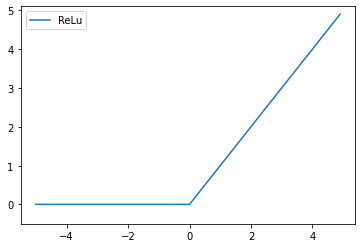

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def ReLu(x):
    return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = ReLu(x)

plt.plot(x,y, label='ReLu')
plt.ylim(-0.5, 5.1)
plt.legend()
plt.show()

`다차원 배열`

In [11]:
import numpy as np


A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [12]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


`행렬의 곱`

In [13]:
A = np.array([[1,2], [3,4]])
print(A)
print(A.shape)

B = np.array([[5,6], [7,8]])
print(B)
print(B.shape)

print(np.dot(A,B)) 

[[1 2]
 [3 4]]
(2, 2)
[[5 6]
 [7 8]]
(2, 2)
[[19 22]
 [43 50]]


    - 두 행렬의 곱은 np.dot() 으로 계산
    - np.dot()은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬의 곱을 계산
    - np.dot(A,B)와 np.dot(B,A)는 다른 값이 될 수 있음

In [14]:
A = np.array([[1,2,3], [4,5,6]])
print(A.shape)
B= np.array([[1,2], [3,4], [5,6]])
print(B.shape)

print(np.dot(A,B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [15]:
C = np.array([[1,2], [3,4]])
print(C.shape)
print(A.shape)

print(np.dot(A,C))

(2, 2)
(2, 3)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

    - 행렬 A의 1 번째 차원(dim) 과 행렬 C의 0 번째 차원(dim 0)의 원소 수가 다르다는 오류(차원의 인덱스는 0부터 시작)
    - 다차원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 함

In [16]:
A = np.array([[1,2], [3,4], [5,6]])
print(A.shape)
B = np.array([7,8])
print(B.shape)

print(np.dot(A,B))

(3, 2)
(2,)
[23 53 83]


In [17]:
X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5], [2,4,6]])
print(W)

y = np.dot(X,W)
print(y)

(2,)
[[1 3 5]
 [2 4 6]]
[ 5 11 17]



    - 다차원 배열의 스칼라곱을 구해주는 np.dot 함수를 이용하면 결과 Y를 계산

`다차원 배열을 이용하여 3층 신경망 구현`

In [18]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1)+B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [19]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [20]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [21]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
y = identity_function(A3)  # 혹은 y = A3

    - 항등 함수인 identity_function()을 정의, 출력층의 활성화 함수로 이용
    - 항등 함수는 입력을 그대로 출력하는 함수
    - 출력층의 활성화 함수를 σ()로 표시하여 은닉층의 활성화 함수 h()와 다르게 명시함
  

`3층 신경망 구현 정리`

In [22]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5,], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2,0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network , x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


`소프트맥스 함수 구현`

In [23]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수함수
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [24]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

print(softmax(a))

[0.01821127 0.24519181 0.73659691]


`softmax 함수 개선 수식`

In [25]:
a = np.array([1010, 1000, 990])
print(np.exp(a)/np.sum(np.exp(a)))

c = np.max(a)
print(a-c)

print(np.exp(a-c)/np.sum(np.exp(a-c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


<ipython-input-25-d73a767fc67f>:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(a)/np.sum(np.exp(a)))
<ipython-input-25-d73a767fc67f>:2: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a)/np.sum(np.exp(a)))


     - 입력 신호 중 최댓값(c)을 빼주면 올바르게 계산할 수 있음

In [26]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

print(softmax(a))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


`softmax() 함수를 사용한 신경망 출력`

In [27]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


**`MNIST`**

In [28]:
import tensorflow as tf

(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


    - (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    

In [29]:
import sys, os
import numpy as np
import tensorflow as tf
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img_show(img)

5
(28, 28)


In [41]:
import pickle5 as pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f, encoding='bytes')
    return network

def predict(network, x):
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    x = x.reshape(-1,784)
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)
    
    return y

In [42]:

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
print('Accuracy :' + str(float(accuracy_cnt) / len(x)))

<ipython-input-6-233ffe07162b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 +np.exp(-x))


Accuracy :0.9207


    -> 올바르게 분류한 비율 0.92 (92%)

`파이썬 인터프리터에서 신경망 각 층의 가중치 형상 출력`

In [44]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 28, 28)
(28, 28)
(784, 50)
(50, 100)
(100, 10)


`배치 처리 구현`

In [45]:
x, t = get_data()
network = init_network()

batch_size = 100 #배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print('Accuracy :' + str(float(accuracy_cnt) / len(x)))

Accuracy :0.9207


<ipython-input-6-233ffe07162b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 +np.exp(-x))


    - range(start, end) 인수 지정하여, start에서 end-1 까지 정수를 차례로 반환하는 반복자 iterator 돌려줌
    - range(start, end, step) 인수 3개 지정하여, start 에서 end-1까지 step 간격으로 증가하는 정수를 반환하는 반복자

In [46]:
print(list(range(0,10)))
print(list(range(0,10,3)))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]


    - range() 함수가 반환하는 반복자를 바탕으로 x[i:i+batch_size] 에서 입력 데이터를 묶음
    - x[i:i+batch_size]는 입력 데이터의 i번째부터 i+batch_size번까지 데이터를 묶음
    - argmax()로 최댓밗의 인덱스를 가져오면서, axis=1 인수를 추가하여, 100x10의 배열 중 1번째 차원을 구성하는 각 원소에서 (1번째 차원을 축으로) 최댓값의 인덱스를 찾도록 함
    - 인덱스가 0부터 시작하므로, 0번째 차원이 가장 처음 차원임)

In [47]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)

print(y)


[1 2 1 0]


In [48]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])

print(y==t)

print(np.sum(y==t))

[ True  True False  True]
3
